In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image_path = 'mandrill.jpeg'
gambar = cv2.imread(image_path)

In [4]:
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

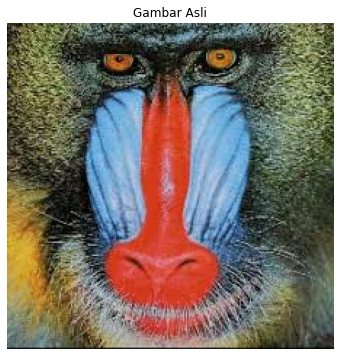

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(gambar_rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

In [6]:
hist_total = cv2.calcHist([gambar], [0], None, [256], [0, 256]) + \
             cv2.calcHist([gambar], [1], None, [256], [0, 256]) + \
             cv2.calcHist([gambar], [2], None, [256], [0, 256])

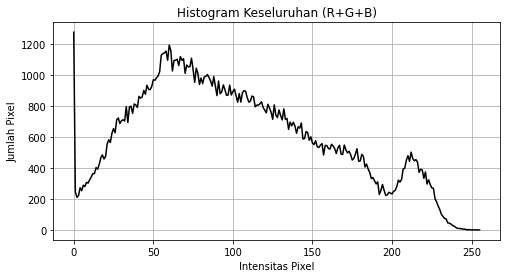

In [7]:
plt.figure(figsize=(8,4))
plt.plot(hist_total, color='black')
plt.title('Histogram Keseluruhan (R+G+B)')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Pixel')
plt.grid()
plt.show()

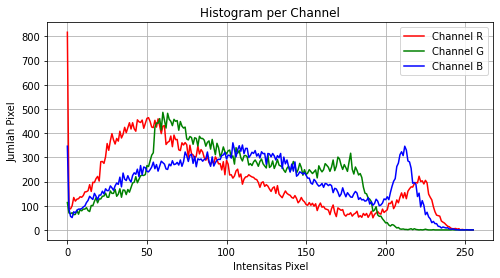

In [8]:
warna = ('r', 'g', 'b')
plt.figure(figsize=(8,4))
for i, col in enumerate(warna):
    hist_channel = cv2.calcHist([gambar], [i], None, [256], [0,256])
    plt.plot(hist_channel, color=col, label=f'Channel {col.upper()}')

plt.title('Histogram per Channel')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Pixel')
plt.legend()
plt.grid()
plt.show()

In [9]:
shift_value = 50 

In [10]:
def shift_channel(channel, shift):
    shifted = np.clip(channel + shift, 0, 255)
    return shifted.astype(np.uint8)

In [11]:
b, g, r = cv2.split(gambar)
b_shifted = shift_channel(b, shift_value)
g_shifted = shift_channel(g, shift_value)
r_shifted = shift_channel(r, shift_value)

gambar_shifted = cv2.merge([b_shifted, g_shifted, r_shifted])
gambar_shifted_rgb = cv2.cvtColor(gambar_shifted, cv2.COLOR_BGR2RGB)

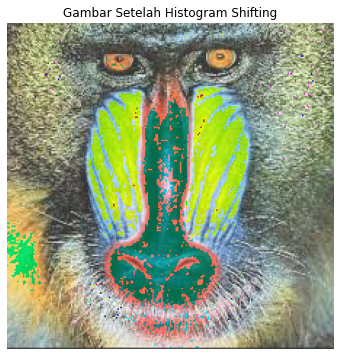

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(gambar_shifted_rgb)
plt.axis('off')
plt.title('Gambar Setelah Histogram Shifting')
plt.show()

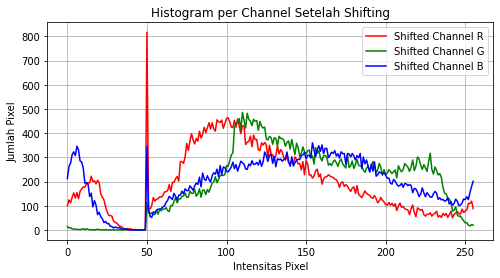

In [13]:
plt.figure(figsize=(8,4))
for i, col in enumerate(warna):
    hist_channel = cv2.calcHist([gambar_shifted], [i], None, [256], [0,256])
    plt.plot(hist_channel, color=col, label=f'Shifted Channel {col.upper()}')

plt.title('Histogram per Channel Setelah Shifting')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Jumlah Pixel')
plt.legend()
plt.grid()
plt.show()